In [1]:
# install.packages("packcircles")

In [1]:
# install.packages("devtools")
# library(devtools)

# devtools::install_github("Arcadia-Science/arcadia-color-brewer")
# install.packages("taxonomizr", version = "0.10.2")
install.packages("packcircles", version = "0.3.6")
# install.packages("rsqlite", version = "2.3.0")
# install.packages("sm", version = "2.2")
# install.packages("taxizedb", version = "0.3.1")
# install.packages("vioplot", version = "0.5.0")

Warning message in install.packages("packcircles", version = "0.3.6"):
“installation of package ‘packcircles’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(packcircles)
library(ggplot2)

In [13]:
library('arrow')
uniprot_data = read_parquet("uniprot_sprot_taxonomy_summary_with_domains.parquet")
head(uniprot_data)

organism,reviewed_count,unreviewed_count,pdb_structures_count,organism_id,lineage,type,type_merge_microbes,superdomain,domain,kingdom,reviewed_count_radius,unreviewed_count_radius,pdb_structures_count_radius
<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Homo sapiens,20417,20417,8511,9606,Catarrhini; Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Haplorrhini; Hominidae; Homo; Mammalia; Metazoa; Primates; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,80.61596,80.61596,52.04936
Mus musculus,17228,17228,2458,10090,Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Glires; Mammalia; Metazoa; Muridae; Murinae; Muroidea; Mus; Myomorpha; Rodentia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,74.05297,74.05297,27.97152
Arabidopsis thaliana,16396,16396,1057,3702,Arabidopsis; Brassicaceae; Brassicales; Camelineae; Embryophyta; Eukaryota; Gunneridae; Magnoliopsida; Pentapetalae; Spermatophyta; Streptophyta; Tracheophyta; Viridiplantae; eudicotyledons; malvids; rosids,Plant,Plant,Cellular Life,Eukaryota,Plant,72.24271,72.24271,18.34267
Rattus norvegicus,8209,8209,724,10116,Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Glires; Mammalia; Metazoa; Muridae; Murinae; Muroidea; Myomorpha; Rattus; Rodentia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,51.11757,51.11757,15.18079
Saccharomyces cerevisiae (strain ATCC 204508 / S288c),6733,6733,2114,559292,Ascomycota; Dikarya; Eukaryota; Fungi; Saccharomyces; Saccharomycetaceae; Saccharomycetales; Saccharomycetes; Saccharomycotina,Fungi,Fungi,Cellular Life,Eukaryota,Fungi,46.29450,46.29450,25.94045
Bos taurus,6048,6048,560,9913,Artiodactyla; Bos; Bovidae; Bovinae; Chordata; Craniata; Eukaryota; Euteleostomi; Eutheria; Laurasiatheria; Mammalia; Metazoa; Pecora; Ruminantia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,43.87640,43.87640,13.35116


In [3]:
pdb_data = read.csv('uniprot_sprot_with_pdb.csv')
head(pdb_data)

,organism,reviewed_count,unreviewed_count,pdb_structures_count,organism_id,lineage,type,type_merge_microbes,superdomain,domain,kingdom,reviewed_count_radius,unreviewed_count_radius,pdb_structures_count_radius
,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Homo sapiens,20417,20417,8511,9606,Catarrhini; Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Haplorrhini; Hominidae; Homo; Mammalia; Metazoa; Primates; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,80.61596,80.61596,52.04936
2,Mus musculus,17228,17228,2458,10090,Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Glires; Mammalia; Metazoa; Muridae; Murinae; Muroidea; Mus; Myomorpha; Rodentia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,74.05297,74.05297,27.97152
3,Arabidopsis thaliana,16396,16396,1057,3702,Arabidopsis; Brassicaceae; Brassicales; Camelineae; Embryophyta; Eukaryota; Gunneridae; Magnoliopsida; Pentapetalae; Spermatophyta; Streptophyta; Tracheophyta; Viridiplantae; eudicotyledons; malvids; rosids,Plant,Plant,Cellular Life,Eukaryota,Plant,72.24271,72.24271,18.34267
4,Rattus norvegicus,8209,8209,724,10116,Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Glires; Mammalia; Metazoa; Muridae; Murinae; Muroidea; Myomorpha; Rattus; Rodentia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,51.11757,51.11757,15.18079
5,Saccharomyces cerevisiae (strain ATCC 204508 / S288c),6733,6733,2114,559292,Ascomycota; Dikarya; Eukaryota; Fungi; Saccharomyces; Saccharomycetaceae; Saccharomycetales; Saccharomycetes; Saccharomycotina,Fungi,Fungi,Cellular Life,Eukaryota,Fungi,46.29450,46.29450,25.94045
6,Bos taurus,6048,6048,560,9913,Artiodactyla; Bos; Bovidae; Bovinae; Chordata; Craniata; Eukaryota; Euteleostomi; Eutheria; Laurasiatheria; Mammalia; Metazoa; Pecora; Ruminantia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,43.87640,43.87640,13.35116


### Test with the full code from Arcadia

Cribbed from: https://github.com/Arcadia-Science/2024-protein-universe/blob/v1.0/code/protein-universe-analysis.R and https://github.com/Arcadia-Science/2024-protein-universe/blob/v1.0/code/protein-universe-utils.R#L367

In [ ]:


# data <- data.frame(
#   group = pdb_names,
#   value = pdb_species
# )
# data$kingdom <- pdb_taxonomy$superkingdom[match(
#   data$group,
#   pdb_taxonomy$ncbi_id
# )]
# data <- data[data$kingdom %in% c("Archaea", "Bacteria", "Eukaryota"), ]
# data <- data[order(data$kingdom), ]

data <- pdb_data[pdb_data$domain %in% c("Archaea", "Bacteria", "Eukaryota"), ]
data <- data[order(data$domain), ]
nrow(data)

packing <- circleProgressiveLayout(data$pdb_structures_count,
  sizetype = "area"
)
data <- cbind(data, packing)
dat.gg <- circleLayoutVertices(packing,
  npoints = 50
)
dat.gg$value <- rep(data$pdb_structures_count, each = 51)
dat.gg$domain <- rep(data$domain, each = 51)


# Set up color dicitionary for plots
seanome_colors <- c(
'#1e3d6b',
 '#206E82',
 '#45B1A8',
 '#18495A',
 '#89C2BA',
 '#D4E6E4',
 '#2D7A8F',
 '#C4A5B5',
 '#BFA065',
 '#8B7A9F'
)

cols <- seanome_colors[5:7]
names(cols) <- c("Archaea", "Bacteria", "Eukaryota")
cols <- cols[match(
  data$domain,
  names(cols)
)]

ggplot() +

  # Make the bubbles
  geom_polygon(
    data = dat.gg, aes(x,
      y,
      group = id,
      fill = as.factor(domain)
    ),
    linewidth = 0.2,
    colour = "black"
  ) +
  scale_fill_manual(values = cols) +
  scale_size_continuous(range = c(1, 4)) +

  # General theme:
  theme_void() +
  theme(legend.position = "none") +
  coord_equal()


## Make this into a function

In [ ]:
# Set up color dicitionary for plots
seanome_colors <- c(
'#1e3d6b',
 '#206E82',
 '#45B1A8',
 '#18495A',
 '#89C2BA',
 '#D4E6E4',
 '#2D7A8F',
 '#C4A5B5',
 '#BFA065',
 '#8B7A9F'
)



plot_circles = function(value_col, domain_col, species_col, domains_to_use=c("Archaea", "Bacteria", "Eukaryota")) {
    

data <- data.frame(
  species = species_col,
  value = value_col,
    domain = domain_col
)

    # Make sure to only use nonzero values
    data = data[data$value > 0]

data <- data[data$domain %in% domains_to_use, ]
data <- data[order(data$domain), ]
# print(nrow(data))
# print(head(data$value))

packing <- circleProgressiveLayout(data$value,
  sizetype = "area"
)
data <- cbind(data, packing)
dat.gg <- circleLayoutVertices(packing,
  npoints = 50
)
dat.gg$value <- rep(data$value, each = 51)
dat.gg$domain <- rep(data$domain, each = 51)



cols <- seanome_colors[5:7]
names(cols) <- domains_to_use
cols <- cols[match(
  data$domain,
  names(cols)
)]

ggplot() +

  # Make the bubbles
  geom_polygon(
    data = dat.gg, aes(x,
      y,
      group = id,
      fill = as.factor(domain)
    ),
    linewidth = 0.2,
    colour = "black"
  ) +
  scale_fill_manual(values = cols) +
  scale_size_continuous(range = c(1, 4)) +

  # General theme:
  theme_void() +
  theme(legend.position = "none") +
  coord_equal()

    }

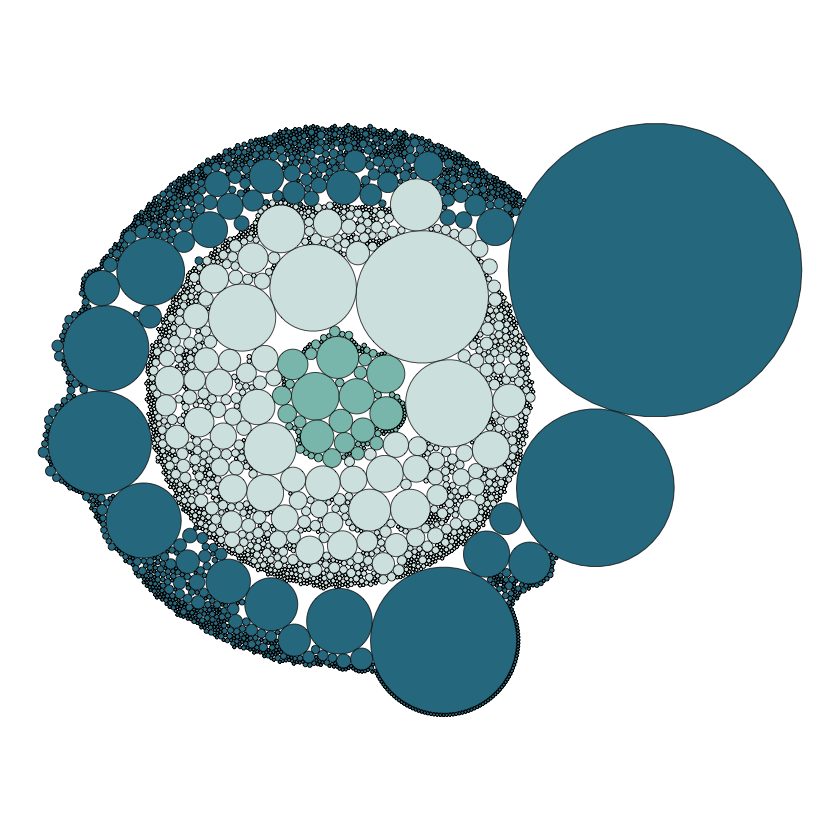

In [ ]:
plot_circles(uniprot_data$pdb_structures_count, uniprot_data$domain, uniprot_data$organism)

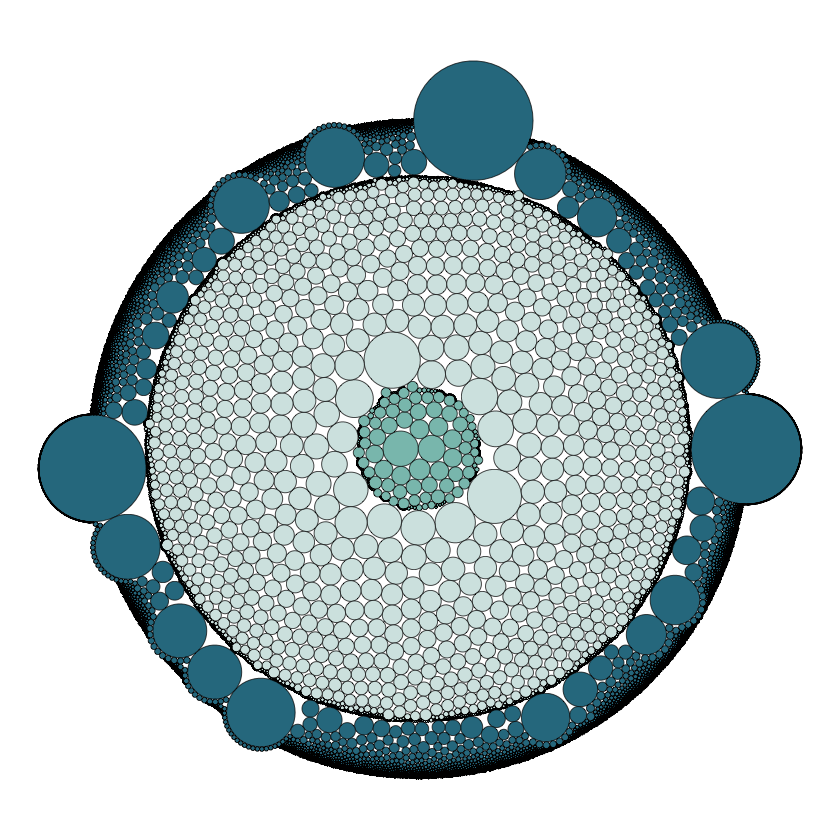

In [14]:
plot_circles(uniprot_data$reviewed_count, uniprot_data$domain, uniprot_data$organism)

## Total number of proteins

In [ ]:
predicted_n_proteins = read_parquet("predicted_n_proteins.parquet")
head(predicted_n_proteins)

In [ ]:
shape(predicted_n_proteins)


In [ ]:
plot_circles(predicted_n_proteins$n_proteins, predicted_n_proteins$domain, predicted_n_proteins$organism_number)